# _In this notebook we will try to recontruct the CNN input with the help of output class using Tensorflow. We will try to visualize what the CNN means by when fed by the output class._ 

In [1]:
from tensorflow_vgg import vgg16_avg_pool
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Generate a random UNIFORM noise as a input Variable which we will update throughout the process.

In [2]:
random_ = tf.random_uniform(shape=(1, 224, 224, 3), minval=0, maxval=1)
input_img = tf.Variable(initial_value=random_, trainable=True, name="Input_Noise")

#### We will use pre-trained VGG 16 network. Also we have modified the network a bit. Here we use average pooling instead of max pooling.

In [3]:
vgg = vgg16_avg_pool.Vgg16()

D:\LEARN\Deep Learning\2. Reconstruct CNN input\tensorflow_vgg\vgg16.npy
npy file loaded


In [4]:
vgg.build(input_img)

build model started
build model finished: 3s


In [5]:
target_output = np.zeros(shape=(1, 1000), dtype=np.float32)
target_output[0][130] = 1

pred_output = vgg.fc8

loss = tf.reduce_mean(tf.square(tf.subtract(target_output, pred_output)))

#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=target_output, logits=pred_output))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

In [6]:
epochs = 10000
eps_output = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    original = sess.run(input_img)
    eps_output.append(np.squeeze(original))
    
    for i in range(epochs):
        _, loss_ = sess.run([optimizer, loss])
        
        if (i+1) % 100 == 0:
            print("Epoch: {}/{}".format(i+1, epochs), "Loss: ", loss_)
            after = sess.run(input_img)
            eps_output.append(np.squeeze(after))

Epoch: 100/10000 Loss:  0.10789575
Epoch: 200/10000 Loss:  0.0710535
Epoch: 300/10000 Loss:  0.055295326
Epoch: 400/10000 Loss:  0.04417335
Epoch: 500/10000 Loss:  0.033154804
Epoch: 600/10000 Loss:  0.028537579
Epoch: 700/10000 Loss:  0.026383659
Epoch: 800/10000 Loss:  0.025397263
Epoch: 900/10000 Loss:  0.024682583
Epoch: 1000/10000 Loss:  0.024214806
Epoch: 1100/10000 Loss:  0.023826377
Epoch: 1200/10000 Loss:  0.023512393
Epoch: 1300/10000 Loss:  0.023237774
Epoch: 1400/10000 Loss:  0.02296377
Epoch: 1500/10000 Loss:  0.022718124
Epoch: 1600/10000 Loss:  0.022475192
Epoch: 1700/10000 Loss:  0.022221709
Epoch: 1800/10000 Loss:  0.021971762
Epoch: 1900/10000 Loss:  0.021712238
Epoch: 2000/10000 Loss:  0.021433938
Epoch: 2100/10000 Loss:  0.021202803
Epoch: 2200/10000 Loss:  0.021009067
Epoch: 2300/10000 Loss:  0.020826912
Epoch: 2400/10000 Loss:  0.020599293
Epoch: 2500/10000 Loss:  0.02037089
Epoch: 2600/10000 Loss:  0.020165835
Epoch: 2700/10000 Loss:  0.019951666
Epoch: 2800/1000

In [7]:
np.array(eps_output).shape

(101, 224, 224, 3)

In [8]:
op = np.array(eps_output)

def post_process(x):
    # normalize the optimized noise obtained from CNN
    x -= x.mean()
    x /= (x.std() + 1e-05)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x


for i in range(op.shape[0]):
    op[i] = post_process(op[i])

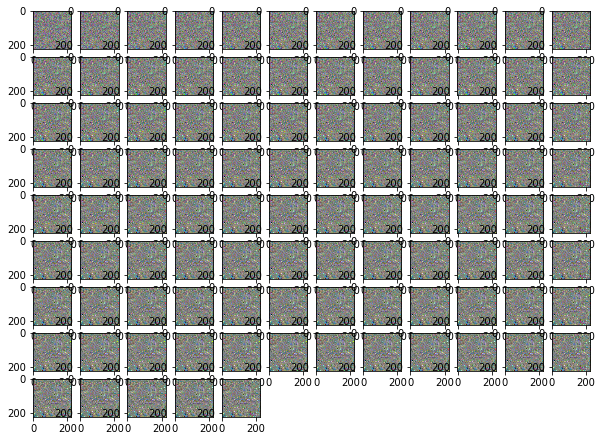

In [9]:
fig = plt.figure(figsize=(10, 10))

rows = 12
cols = 12

for i in range(op.shape[0]):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(op[i])

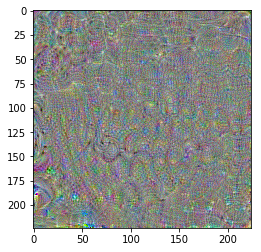

In [10]:
plt.imshow(op[10])

In [11]:
input_image = np.expand_dims(op[100], 0)
input_image.shape
vgg = vgg16_avg_pool.Vgg16()
vgg.build(input_image)

D:\LEARN\Deep Learning\2. Reconstruct CNN input\tensorflow_vgg\vgg16.npy
npy file loaded
build model started
build model finished: 4s


In [12]:
with tf.Session() as sess:
    output_prediction = sess.run(vgg.prob)

In [13]:
np.argmax(output_prediction)

216

### _As you can see that we failed to generate the image as well as predict the image class._